<a href="https://colab.research.google.com/github/delonfadhil/MachineLearningTasks/blob/main/UASMachineLearning/UAS_MNIST_Fadhil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Fadhil Dzikri Aqila

NIM : 1103213136

Dataset : MNIST Handwritten digits

#Import Library

In [64]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

#Memuat Dataset

In [65]:
# Muat dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Melihat jumlah data pelatihan
print("Jumlah data train:", X_train.shape[0])

# Melihat jumlah data pengujian
print("Jumlah data test:", X_test.shape[0])

Jumlah data train: 60000
Jumlah data test: 10000


#Isi Dataset

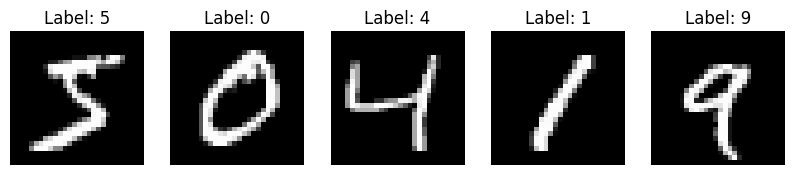

In [66]:
# Menentukan jumlah gambar yang akan ditampilkan
num_images = 5

# Buat plot untuk menampilkan gambar
plt.figure(figsize=(10, 2))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

#Preprocessing Dataset

##Mengubah dimensi gambar

In [67]:
# Ubah dimensi gambar menjadi (28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#Normalisasi

In [68]:
# Ubah tipe data menjadi float32 dan normalisasi nilai pixel menjadi [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

##One-hot encoding

In [69]:
# Ubah label menjadi one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#Membuat model CNN

In [70]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Training/Pelatihan model

In [71]:
# Latih model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8583 - loss: 0.4896 - val_accuracy: 0.9819 - val_loss: 0.0555
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9812 - loss: 0.0623 - val_accuracy: 0.9855 - val_loss: 0.0427
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9873 - loss: 0.0404 - val_accuracy: 0.9868 - val_loss: 0.0406
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9899 - loss: 0.0328 - val_accuracy: 0.9893 - val_loss: 0.0284
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9932 - loss: 0.0228 - val_accuracy: 0.9889 - val_loss: 0.0331
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9942 - loss: 0.0185 - val_accuracy: 0.9900 - val_loss: 0.0284
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9953 - loss: 0.0146 - val_accuracy: 0.9917 - val_loss: 0.0292
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9963 - loss: 0.0113 - val_accu

#Evaluasi model

In [77]:
# Evaluasi model
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.027718523517251015 / Test accuracy: 0.9915000200271606


#Visualisasi akurasi dan loss

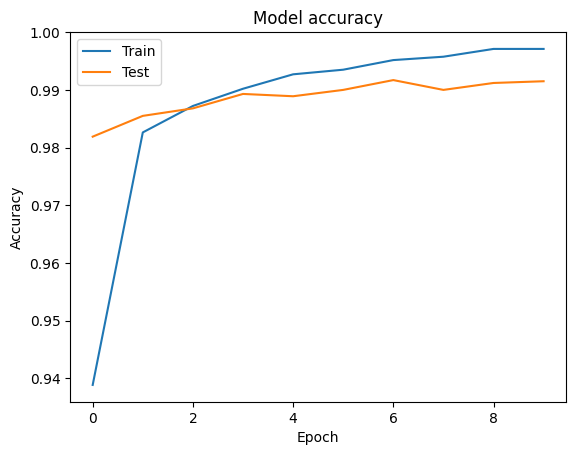

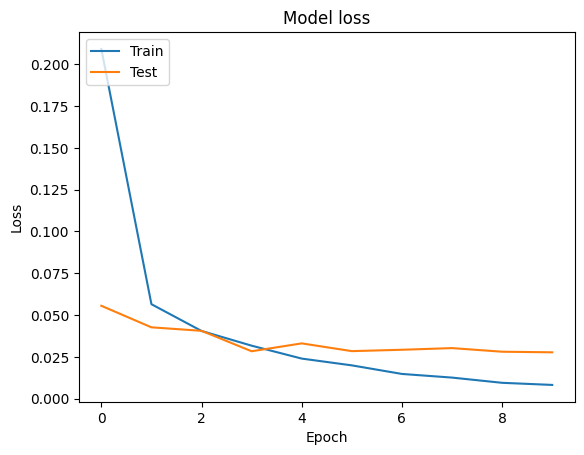

In [73]:
# Plot akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


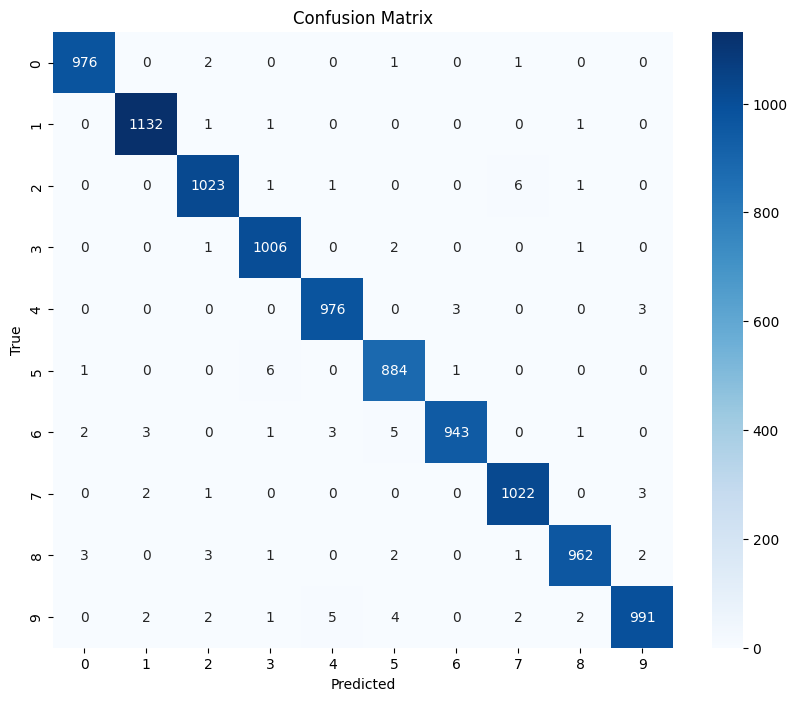

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prediksi label untuk data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Buat confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#Prediksi dan visualisasi

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


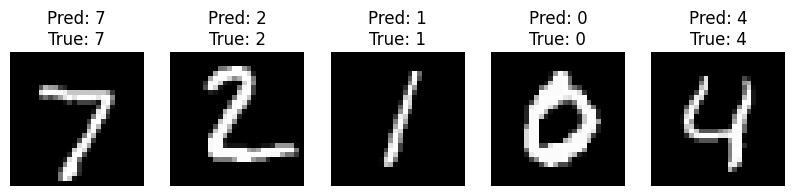

In [75]:
# Lakukan prediksi
predictions = model.predict(X_test)

# Visualisasi beberapa hasil prediksi
num_images = 5
plt.figure(figsize=(10, 2))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {np.argmax(predictions[i])}\nTrue: {np.argmax(y_test[i])}')
    plt.axis('off')
plt.show()

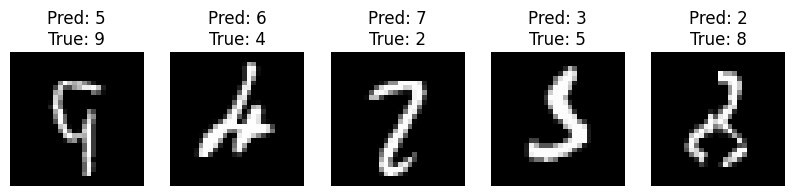

In [76]:
# Mencari contoh-contoh yang salah diklasifikasikan
misclassified_indexes = np.where(y_pred_classes != y_true)[0]

# Menampilkan beberapa contoh yang salah diklasifikasikan
num_images = 5
plt.figure(figsize=(10, 2))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_test[misclassified_indexes[i]].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {y_pred_classes[misclassified_indexes[i]]}\nTrue: {y_true[misclassified_indexes[i]]}')
    plt.axis('off')
plt.show()